In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Daily+temperature+data.csv")
data.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Temperature(Min)  730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [10]:
data.shape

(730, 2)

In [5]:
data.isnull().sum()

Date                0
Temperature(Min)    0
dtype: int64

In [7]:
train_len = 511
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(219)

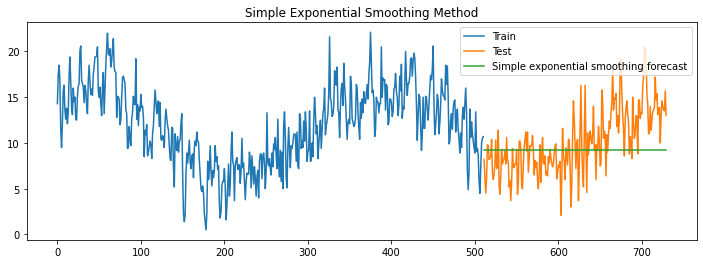

In [12]:
### Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['ses_forecast'])/test['Temperature(Min)'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results
#tempResults

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,3.56,30.24


## Holt's method with trend

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 14.3, 'initial_trend': 3.099999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


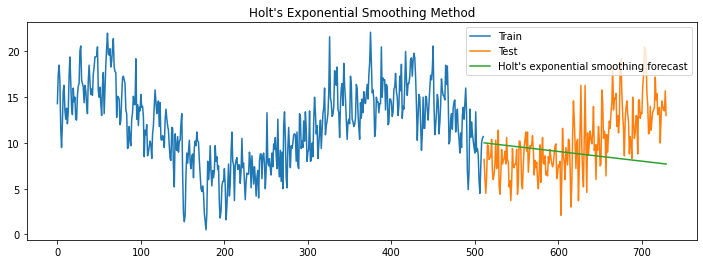

In [25]:
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,3.56,30.24
0,Holt's exponential smoothing method,4.11,34.17


## Holt Winters' additive method with trend and seasonality

In [37]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6743037751257633, 'smoothing_trend': 1.9372169505120404e-10, 'smoothing_seasonal': 5.0524101103151955e-11, 'damping_trend': nan, 'initial_level': 12.401304103525638, 'initial_trend': -0.00987174341113839, 'initial_seasons': array([3.06559811, 2.57151349, 2.59317616, 3.10275654, 2.57705075,
       2.39846935, 2.50840138, 3.15956021, 3.3105285 , 2.99102863,
       3.07147888, 2.81648633, 1.82052655, 2.77128272, 2.96938408,
       2.99696228, 1.94808574, 2.75773751, 2.45587937, 1.7776465 ,
       1.99932833, 2.83281852, 1.66029355, 0.96430724, 1.82712428,
       1.83092047, 2.09963744, 2.71548964, 3.23144388, 3.24720826]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


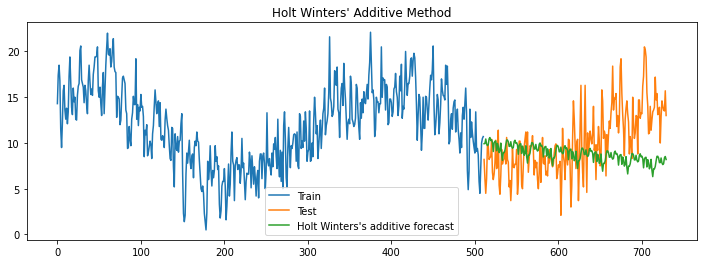

In [38]:
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [39]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_hwa['hw_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results
#doubt?

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,3.56,30.24
0,Holt's exponential smoothing method,4.11,34.17
0,Holt Winters' additive method,4.14,34.37
0,Holt Winters' additive method,4.14,34.37
